In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import io
from google.colab import files
upload = files.upload()

Saving data.csv to data.csv


In [31]:
df = pd.read_csv(io.BytesIO(upload['data.csv']))

In [32]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [33]:
df.drop(columns= ['id','Unnamed: 32'] , inplace= True)

In [34]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [35]:
X = df.iloc[:,1:]
y= df.iloc[:,0]

In [36]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state= 4)

## Note : Alaywas note the before applying KNN to any data scale the data

In [37]:
from sklearn.preprocessing import StandardScaler

trf = StandardScaler()

In [38]:
X_train = trf.fit_transform(X_train)
X_test = trf.transform(X_test)

In [41]:
X_train = pd.DataFrame(X_train,columns=X.columns)

In [43]:
X_test =  pd.DataFrame(X_test,columns=X.columns)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [60]:
# To find the optimal value of k
accu =[]
for i in range(4,20):
  kn = KNeighborsClassifier(n_neighbors=i)
  kn.fit(X_train,y_train.values)
  y_pred = kn.predict(X_test)
  accu.append(accuracy_score(y_test,y_pred))


In [61]:
len(accu)

16

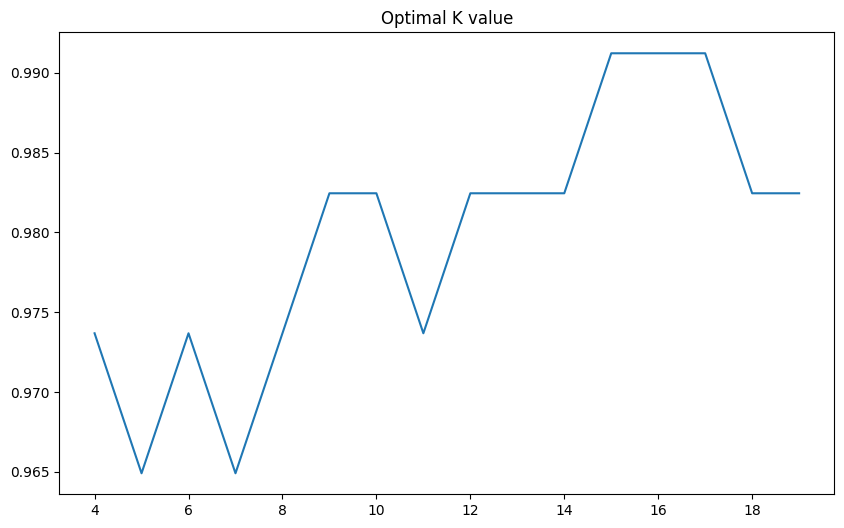

In [63]:
plt.figure(figsize=(10, 6))
plt.title("Optimal K value")
plt.plot(range(4,20),accu)

In [64]:
# optimal value is 17

kn = KNeighborsClassifier(n_neighbors= 17)
kn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [65]:
y_pred1 = kn.predict(X_test)

In [67]:
np.round(accuracy_score(y_test,y_pred1),2)

0.99

In [69]:
from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=17),X_train,y_train,cv=10 , scoring="accuracy"))

0.9514975845410628

In [71]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           B       0.99      1.00      0.99        80
           M       1.00      0.97      0.99        34

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

